In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn import preprocessing
import pickle

In [30]:
df = pd.read_csv("/content/segmentation data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.info()

In [3]:
df.isnull().sum()

,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
sns.pairplot(df)

In [ ]:
sns.boxplot(df)

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Initialize SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy='auto')

# Load your data into a pandas DataFrame.
# Replace 'your_data.csv' with the actual file path.
original_df = pd.read_csv('/content/segmentation data.csv')  # This line is added
original_df=original_df.drop(columns=['ID'],axis=1)

# Scale the DataFrame
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(original_df.values)

# Create a new DataFrame with the scaled values and original column names
df = pd.DataFrame(df_scaled, columns=original_df.columns)


df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5
...,...,...,...,...,...,...,...
1995,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0
1996,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0
1997,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0
1998,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0


In [33]:
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [6]:
y=df['Settlement size']
x=df.drop(columns=['Settlement size','ID'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

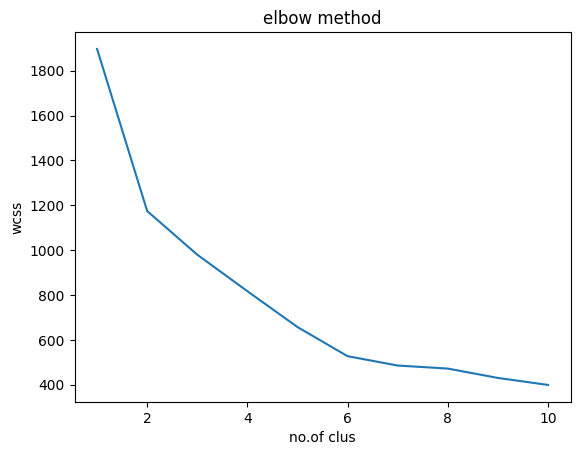

In [14]:
import pandas as pd
from sklearn.preprocessing import minmax_scale
# Import the necessary library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Assuming 'data' is your DataFrame or NumPy array

WCSS = []
for i in range(1, 11):
    # Use KMeans directly from sklearn.cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)  # Append to WCSS, not wcss

# Plot the WCSS values after the loop completes
plt.plot(range(1, 11), WCSS) # Change wcss to WCSS

plt.title('elbow method')
plt.xlabel('no.of clus')
plt.ylabel('wcss')
plt.show()

In [15]:
km_model = KMeans(n_clusters=3, init='k-means++',random_state=0)
ykmeans = km_model.fit_predict(df)
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.000000,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,0.000500,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.001001,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.001501,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.002001,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [16]:
df['kclus'] = pd.Series(ykmeans)

In [17]:
df.head()
y = df['kclus']
x=df.drop(columns=['kclus'],axis=1)

In [18]:
df = df.drop('ID', axis=1)

In [19]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kclus
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,1
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,2
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,0
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,0


In [ ]:
df.head()

In [20]:
df['kclus'] = pd.Series(ykmeans)

In [ ]:
df.head()

In [21]:
y = df['kclus']
x=df.drop(columns=['kclus'],axis=1)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
x_train.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
582,1.0,1.0,0.137931,0.333333,0.238828,0.5,0.5
159,0.0,0.0,0.275862,0.333333,0.144447,0.0,0.0
1827,0.0,1.0,0.275862,0.333333,0.281302,0.5,0.0
318,0.0,0.0,0.241379,0.000000,0.206283,0.5,1.0
708,1.0,1.0,0.120690,0.333333,0.262426,0.5,0.5


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost

In [ ]:
 rand_model = RandomForestClassifier()
 tree_model = tree. DecisionTreeClassifier()
 xgb_model = xgboost.XGBClassifier()

In [ ]:
rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)


In [ ]:
pred = rand_model.predict(x_train)
pred1 = tree_model.predict(x_train)
pred2 = xgb_model.predict(x_train)


In [ ]:
ypred = rand_model.predict(x_test)
ypred1 = tree_model.predict(x_test)
ypred2 = xgb_model.predict(x_test)

In [ ]:
 from sklearn import metrics

In [ ]:
print(metrics.accuracy_score (pred, y_train))
print(metrics.accuracy_score(pred1,y_train))
print(metrics.accuracy_score(pred2,y_train))

In [ ]:
print(metrics.accuracy_score (y_test,ypred))
print(metrics.accuracy_score(y_test,ypred1))
print(metrics.accuracy_score(y_test,ypred2))

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
xg = XGBClassifier()

In [ ]:
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
xg.fit(x_train,y_train)

In [ ]:
pred1=dt.predict(x_train)
pred2=rf.predict(x_train)
pred3=knn.predict(x_train)
pred4=xg.predict(x_train)

In [ ]:
y_pred1=dt.predict(x_test)
y_pred2=rf.predict(x_test)
y_pred3=knn.predict(x_test)
y_pred4=xg.predict(x_test)

In [ ]:
print('Decision Tree:',accuracy_score(y_train,pred1))
print('Random Forest:',accuracy_score(y_train,pred2))
print('KNN:',accuracy_score(y_train,pred3))
print('XGBoost:',accuracy_score(y_train,pred4))

NameError: name 'accuracy_score' is not defined

In [24]:
xgb_model = xgboost.XGBClassifier()
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
import pickle
pickle.dump(xgb_model, open("xgbmodel.pkl", 'wb'))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pickle.dump(sc,open('scaling.pkl','wb'))